In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
%cd /content/drive/MyDrive
!git clone https://github.com/augmentedstartups/yolov7.git
%cd yolov7
!pip install -r requirements.txt
!pip install roboflow

In [ ]:
!%cd /content/drive/MyDrive/yolov7

from roboflow import Roboflow
rf = Roboflow(api_key="JmVb99sSFo1Oon7Ll69R")
project = rf.workspace("detection-rly2f").project("anpr_ir-wmd8a")
version = project.version(1)
dataset = version.download("yolov7")

/bin/bash: line 1: fg: no job control
loading Roboflow workspace...
loading Roboflow project...


Extracting Dataset Version Zip to ANPR_ir-1 in yolov7pytorch:: 100%|██████████| 3522/3522 [00:27<00:00, 126.13it/s]


In [ ]:
%%bash
wget -P /content/drive/MyDrive/yolov7 https://github.com/WongKinYiu/yolov7/releases/download/v0.1/yolov7.pt

In [ ]:
!python train.py --batch 16 --cfg cfg/training/yolov7.yaml --epochs 50 --data /content/drive/MyDrive/yolov7/ANPR_ir-1/data.yaml --weights 'yolov7.pt' --device 0

2024-08-19 12:33:21.938425: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-08-19 12:33:21.964460: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-08-19 12:33:21.970703: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1452] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-08-19 12:33:21.985087: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-08-19 12:33:23.168789: W tensorflow/compiler/tf2

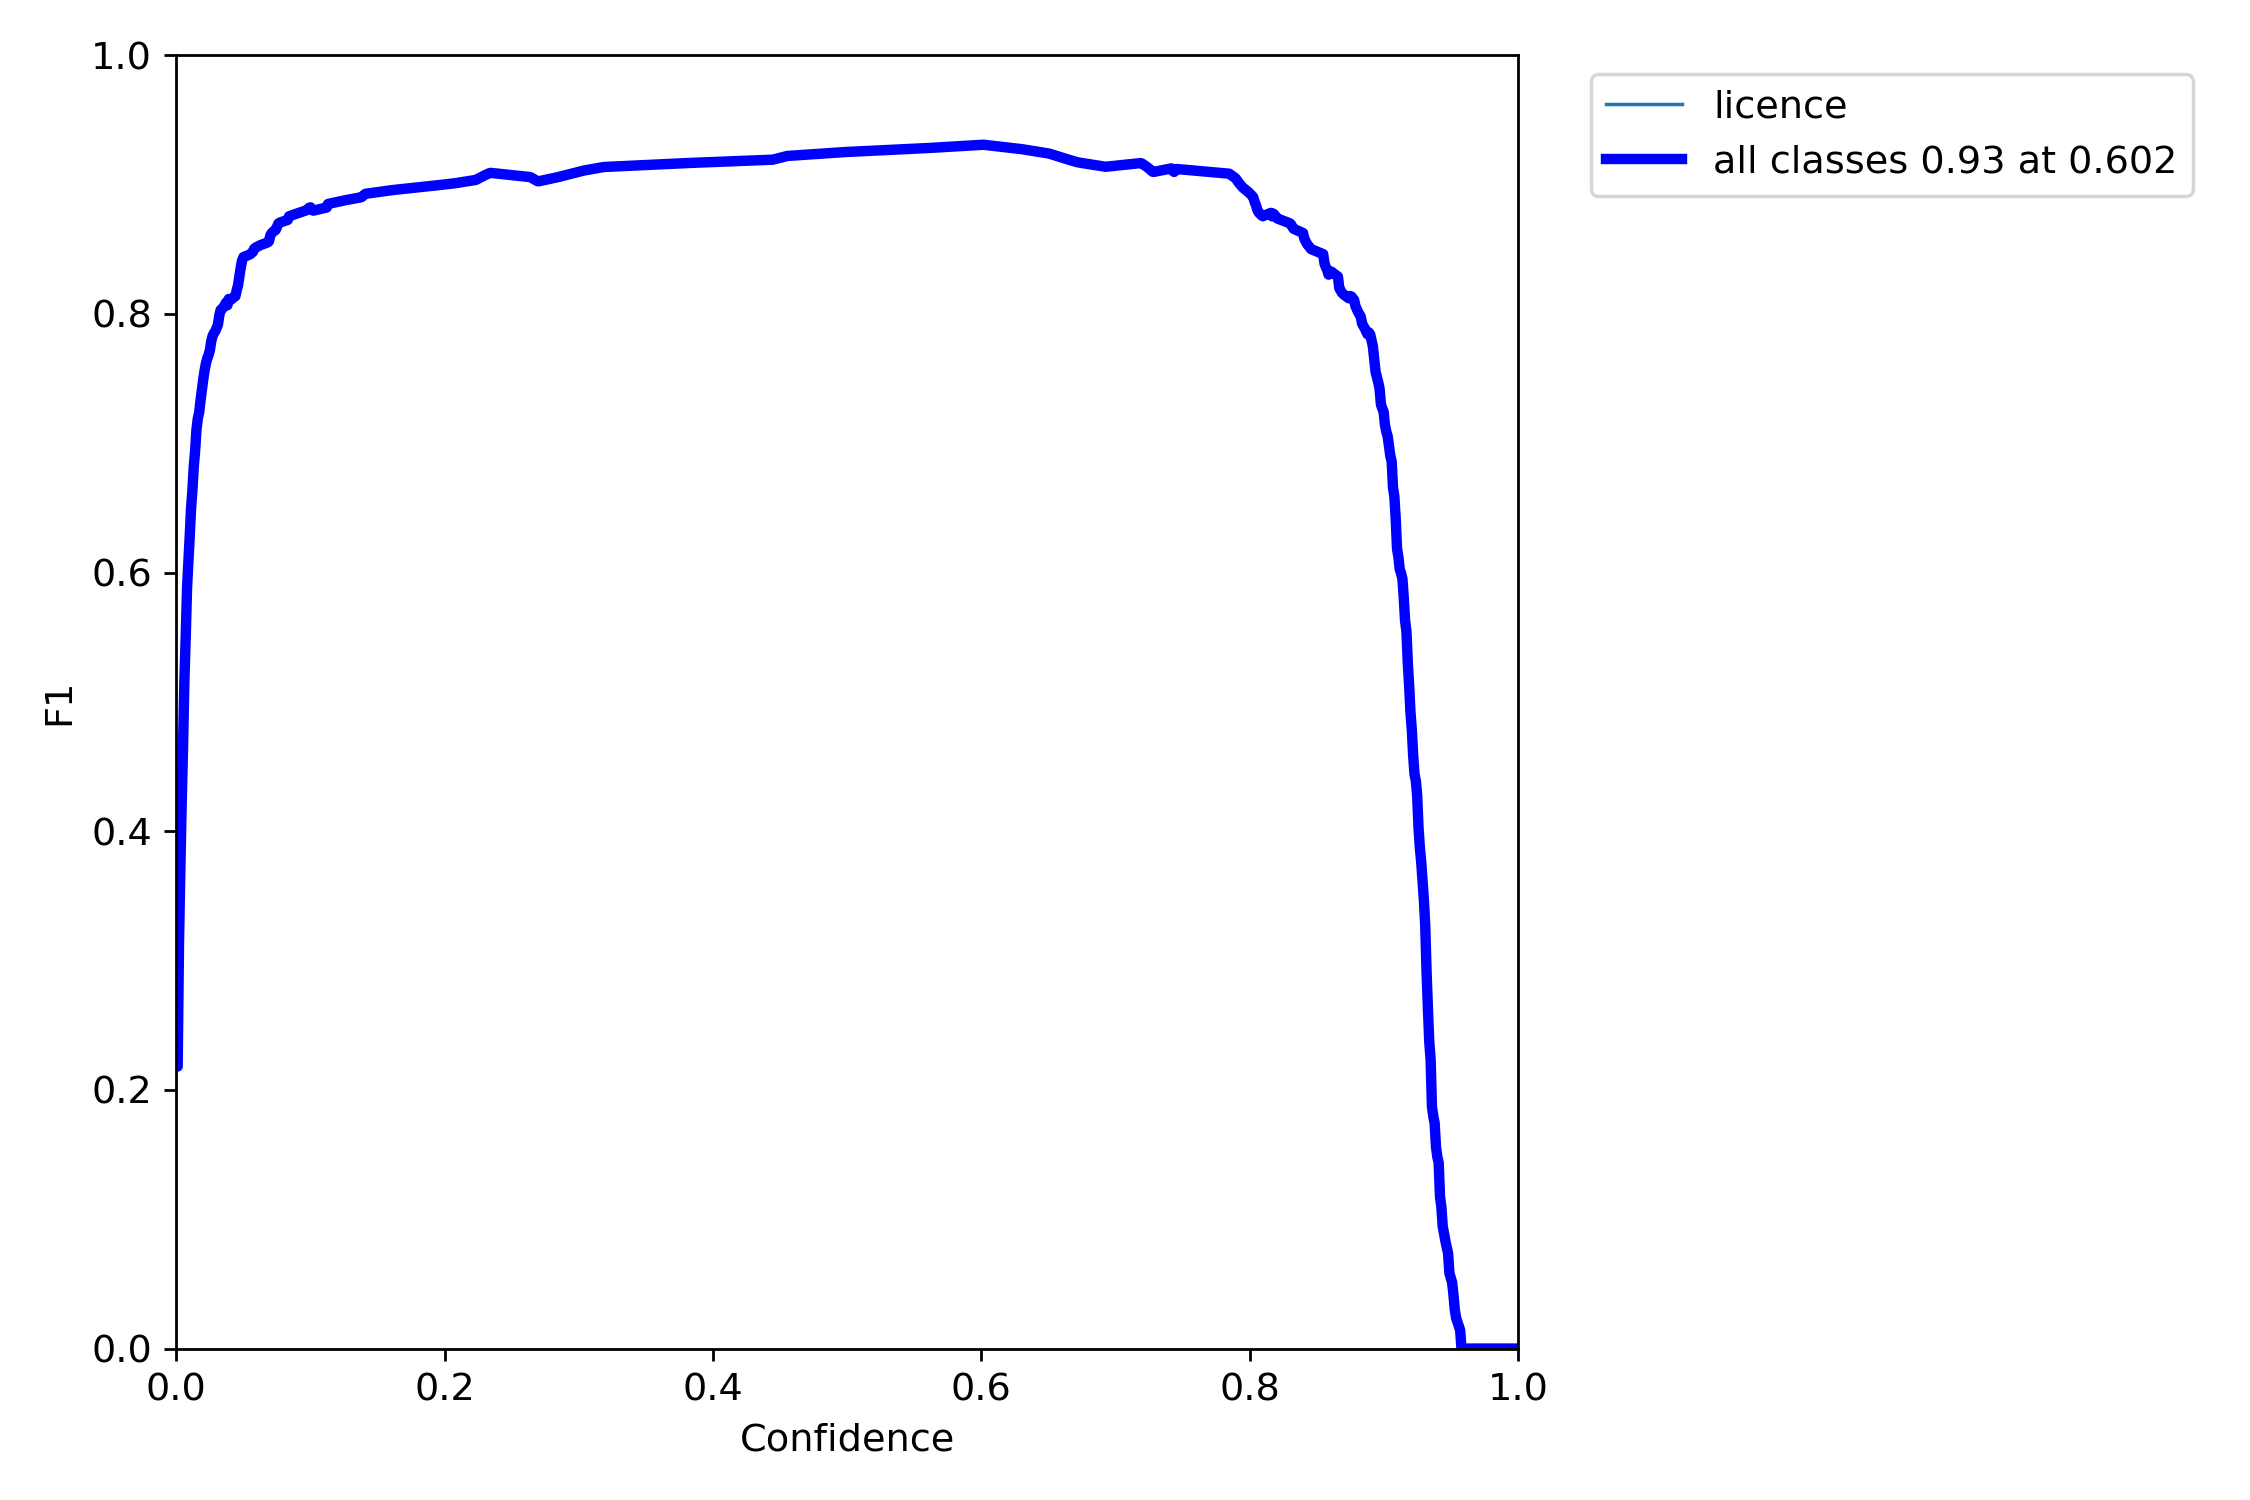

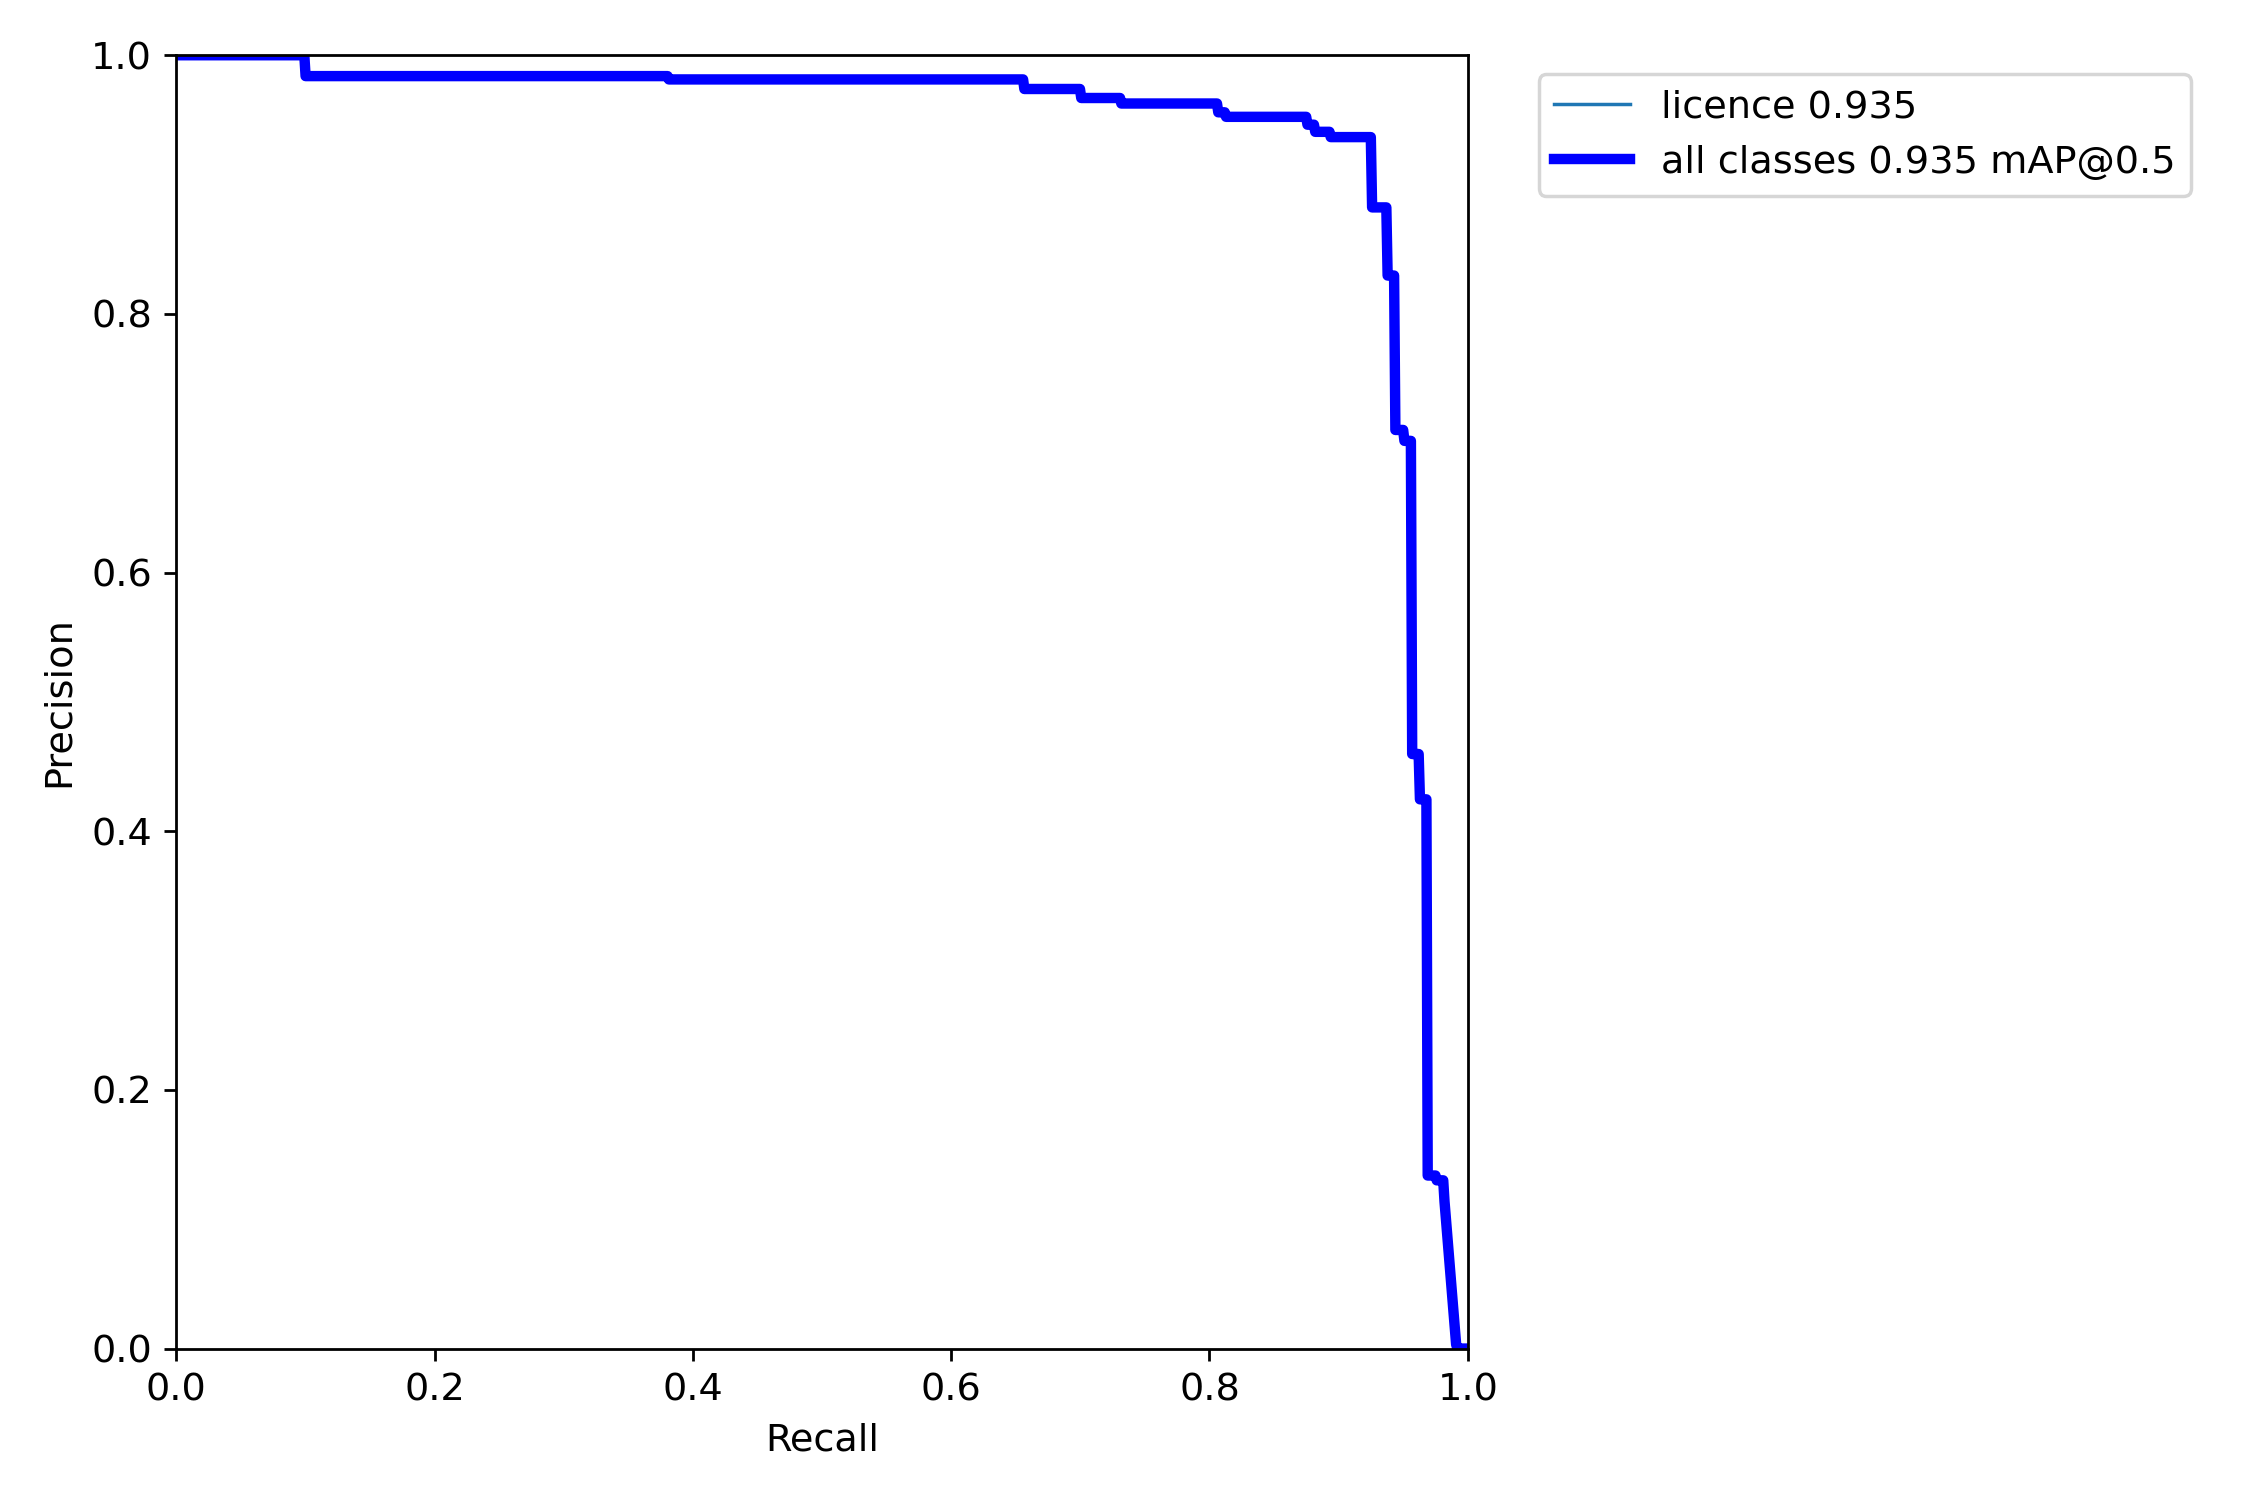

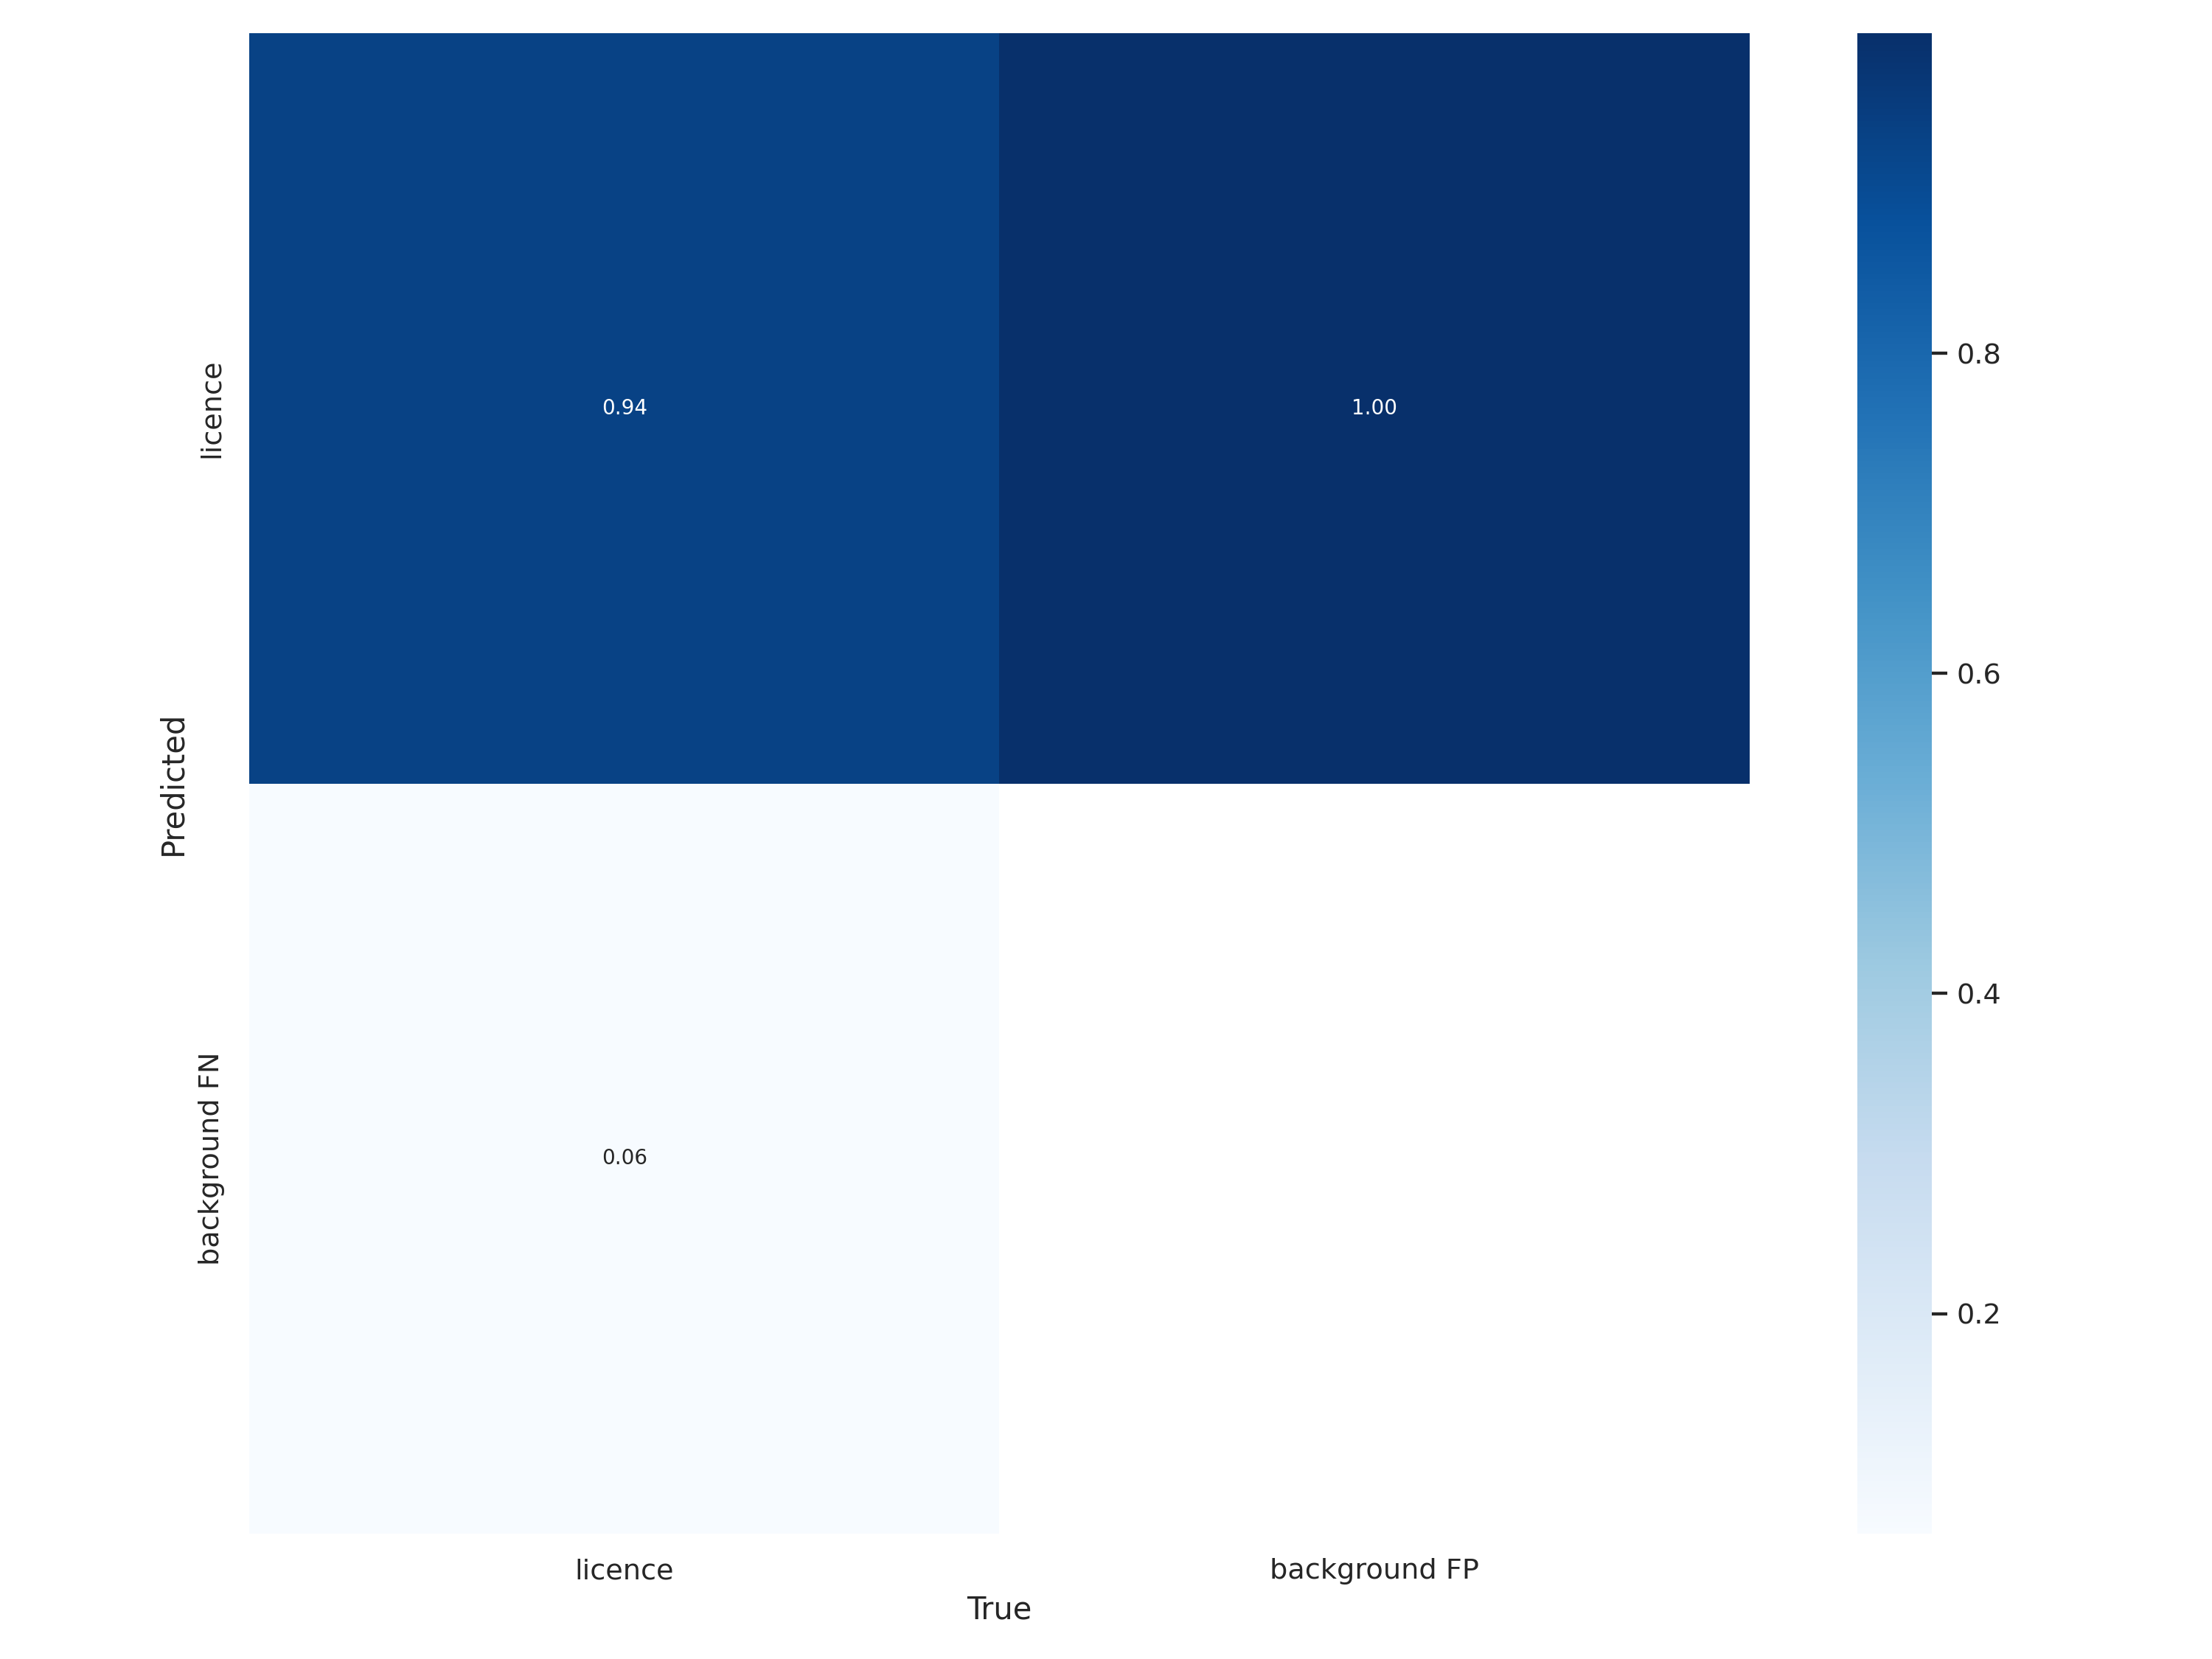

In [ ]:
from IPython.display import Image
display(Image("/content/drive/MyDrive/yolov7/runs/train/exp18/F1_curve.png", width=400, height=400))
display(Image("/content/drive/MyDrive/yolov7/runs/train/exp18/PR_curve.png", width=400, height=400))
display(Image("/content/drive/MyDrive/yolov7/runs/train/exp18/confusion_matrix.png", width=500, height=500))

In [ ]:
!python detect.py --weights /content/drive/MyDrive/yolov7/runs/train/exp18/weights/best.pt --conf 0.1 --source /content/drive/MyDrive/yolov7/ANPR_ir-1/test/images

Namespace(weights=['/content/drive/MyDrive/yolov7/runs/train/exp18/weights/best.pt'], source='/content/drive/MyDrive/yolov7/ANPR_ir-1/test/images', img_size=640, conf_thres=0.1, iou_thres=0.45, device='', view_img=False, save_txt=False, save_conf=False, nosave=False, classes=None, agnostic_nms=False, augment=False, update=False, project='runs/detect', name='exp', exist_ok=False, no_trace=False)
YOLOR 🚀 v0.1-104-g941b94c torch 2.3.1+cu121 CUDA:0 (Tesla T4, 15102.0625MB)

Fusing layers... 
RepConv.fuse_repvgg_block
RepConv.fuse_repvgg_block
RepConv.fuse_repvgg_block
IDetect.fuse
/usr/local/lib/python3.10/dist-packages/torch/functional.py:512: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at ../aten/src/ATen/native/TensorShape.cpp:3587.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]
Model Summary: 314 layers, 36481772 parameters, 6194944 gradients, 103.2 GFLOPS
 Convert model to Traced